In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')
from pipeline.models import wczytanie_materialow, oblicz_alfa, macierz_A, termostat
from pipeline.config import *

materialy = wczytanie_materialow()
alfa_powietrze = oblicz_alfa('powietrze', 1.0)
alfa_cegla = oblicz_alfa('cegla', 1.0)

In [5]:
alfa_mapa = np.ones((ny_3, nx_3)) * alfa_powietrze
alfa_mapa[:, 30] = alfa_cegla
alfa_mapa[:, 60] = alfa_cegla
alfa_wektor = alfa_mapa.flatten()

Średnia temperatura w moim pokoju: 16.39 °C
Zysk ciepła od sąsiadów: 1.39 °C


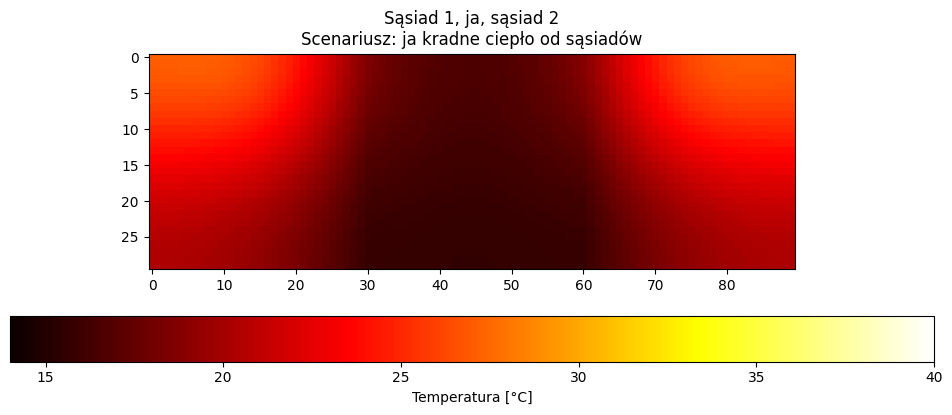

In [6]:
pokoje = np.ones((ny_3, nx_3)) * T_startowa
pokoje[1:5, 10:20] = T_grzejnika
pokoje[1:5, 70:80] = T_grzejnika

u_3 = pokoje.flatten()

maska_3 = (u_3 == T_grzejnika)
indeksy_grzejnikow = (u_3 == T_grzejnika)

maska_on_3 = (u_3 == T_grzejnika)
A_inv_3_on = macierz_A(nx_3, ny_3, alfa_wektor, dt, h_3, maska_on_3)

maska_off_3 = np.zeros(nx_3 * ny_3, dtype=bool) 
A_inv_3_off = macierz_A(nx_3, ny_3, alfa_wektor, dt, h_3, maska_off_3)

for i in range(kroki):
    t1 = u_3[idx_czujnika_sasiad_1]
    t2 = u_3[idx_czujnika_sasiad_2]
    
    if t1 < T_cel or t2 < T_cel:
        u_3[indeksy_grzejnikow] = T_grzejnika
        u_3 = A_inv_3_on @ u_3
    else:
        u_3 = A_inv_3_off @ u_3

wynik_3 = u_3.reshape((ny_3, nx_3))

moj_pokoj_dane = wynik_3[:, 31:60]
srednia_u_mnie = np.mean(moj_pokoj_dane)
std_u_mnie = np.std(moj_pokoj_dane)

print(f"Średnia temperatura w moim pokoju: {srednia_u_mnie:.2f} °C")
print(f"Zysk ciepła od sąsiadów: {srednia_u_mnie - T_startowa:.2f} °C")

plt.figure(figsize=(15, 4))
plt.imshow(wynik_3, cmap='hot', vmin=14, vmax=40)
plt.colorbar(orientation='horizontal', label="Temperatura [°C]")
plt.title(f"Sąsiad 1, ja, sąsiad 2\nScenariusz: ja kradne ciepło od sąsiadów")
plt.show()